# CMAPSSA Dataset Exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

In [2]:
column_names = [
                'id',
                'cycle',
                'setting1',
                'setting2',
                'T2_Total_temperature_at_fan_inlet',
                'T24_Total_temperature_at_LPC_outlet',
                'T30_Total_temperature_at_HPC_outlet',
                'T50_Total_temperature_at_LPT_outlet',
                'P2_Pressure_at_fan_inlet',
                'P15_Total_pressure_in_bypass_duct',
                'P30_Total_pressure_at_HPC_outlet',
                'Nf_Physical_fan_speed',
                'Nc_Physical_core_speed',
                'epr_Engine_pressure_ratio',
                'Ps30_Static_pressure_at_HPC_outlet',
                'phi_Ratio_of_fuel_flow_to_Ps30',
                'NRf_Corrected_fan_speed',
                'NRc_Corrected_core_speed',
                'BPR_Bypass_Ratio',
                'farB_Burner_fuel_air_ratio',
                'htBleed_Bleed_Enthalpy',
                'Nf_dmd_Demanded_fan_speed',
                'PCNfR_dmd_Demanded_corrected_fan_speed',
                'W31_HPT_coolant_bleed',
                'W32_LPT_coolant_bleed',
                  'RUL'
                                                    ]

In [4]:
train_FD001 = pd.read_csv("/home/meghagkrishnan/code/meghagkrishnan/jet_engine/raw_data/train_FD001.txt",sep = ' ', header=None)
columns = ['unit_number','time_in_cycles','os1', 'os2','os3', 'sm1', 'sm2', 'sm3', 'sm4', 'sm5',
           'sm6', 'sm7', 'sm8', 'sm9', 'sm10', 'sm11', 'sm12','sm13', 'sm14','sm15', 'sm16', 'sm17', 
           'sm18', 'sm19','sm20', 'sm21', 'sm22', 'sm23']
train_FD001.columns = columns
data = train_FD001.drop(columns = ['os3','sm22', 'sm23'])
# Calculate RUL as a new column
max_cycles = data.groupby('unit_number')['time_in_cycles'].max()
data = data.merge(max_cycles, on='unit_number', suffixes=('', '_max'))
data['RUL'] = data['time_in_cycles_max'] - data['time_in_cycles']
data = data.drop(columns = ['time_in_cycles_max'])
data.head()

,unit_number,time_in_cycles,os1,os2,sm1,sm2,sm3,sm4,sm5,sm6,...,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,RUL
0,1,1,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [5]:
data.nunique()

unit_number        100
time_in_cycles     362
os1                158
os2                 13
sm1                  1
sm2                310
sm3               3012
sm4               4051
sm5                  1
sm6                  2
sm7                513
sm8                 53
sm9               6403
sm10                 1
sm11               159
sm12               427
sm13                56
sm14              6078
sm15              1918
sm16                 1
sm17                13
sm18                 1
sm19                 1
sm20               120
sm21              4745
RUL                362
dtype: int64

In [6]:
#Since the values for various sensors doesn't have significant effect on RUL, drop such columns
train_FD001 = data.drop(columns = ['sm1','sm5','sm6','sm10','sm16', 'sm18', 'sm19'])
train_FD001.head()

,unit_number,time_in_cycles,os1,os2,sm2,sm3,sm4,sm7,sm8,sm9,sm11,sm12,sm13,sm14,sm15,sm17,sm20,sm21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [7]:
unit1_data = data[data['unit_number'] == 1]
unit1_data.head()

,unit_number,time_in_cycles,os1,os2,sm1,sm2,sm3,sm4,sm5,sm6,...,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,RUL
0,1,1,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


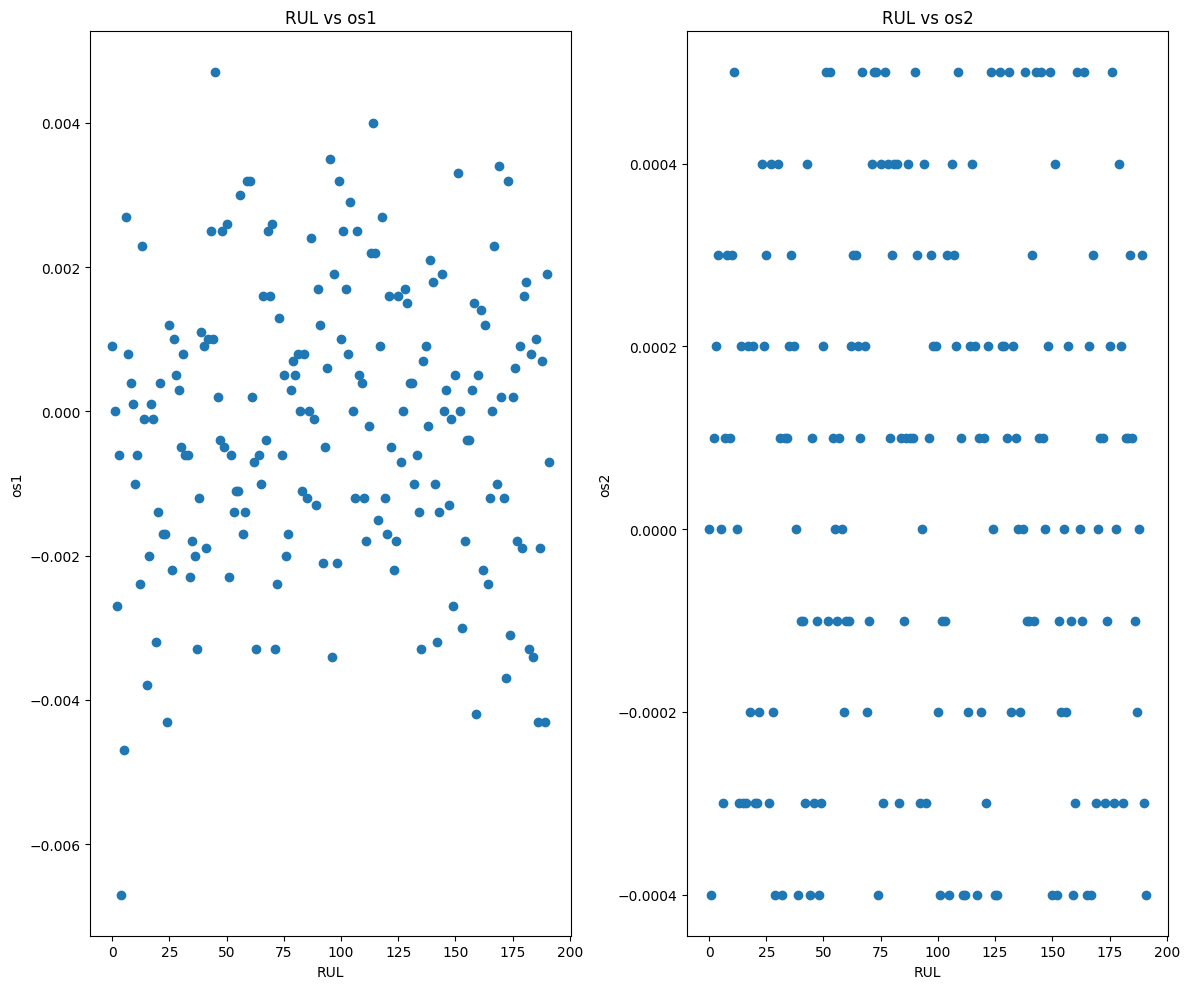

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.scatter(unit1_data['RUL'], unit1_data['os1'])
plt.xlabel('RUL')
plt.ylabel('os1')
plt.title('RUL vs os1')

plt.subplot(1,2,2)
plt.scatter(unit1_data['RUL'], unit1_data['os2'])
plt.xlabel('RUL')
plt.ylabel('os2')
plt.title('RUL vs os2')

plt.tight_layout()

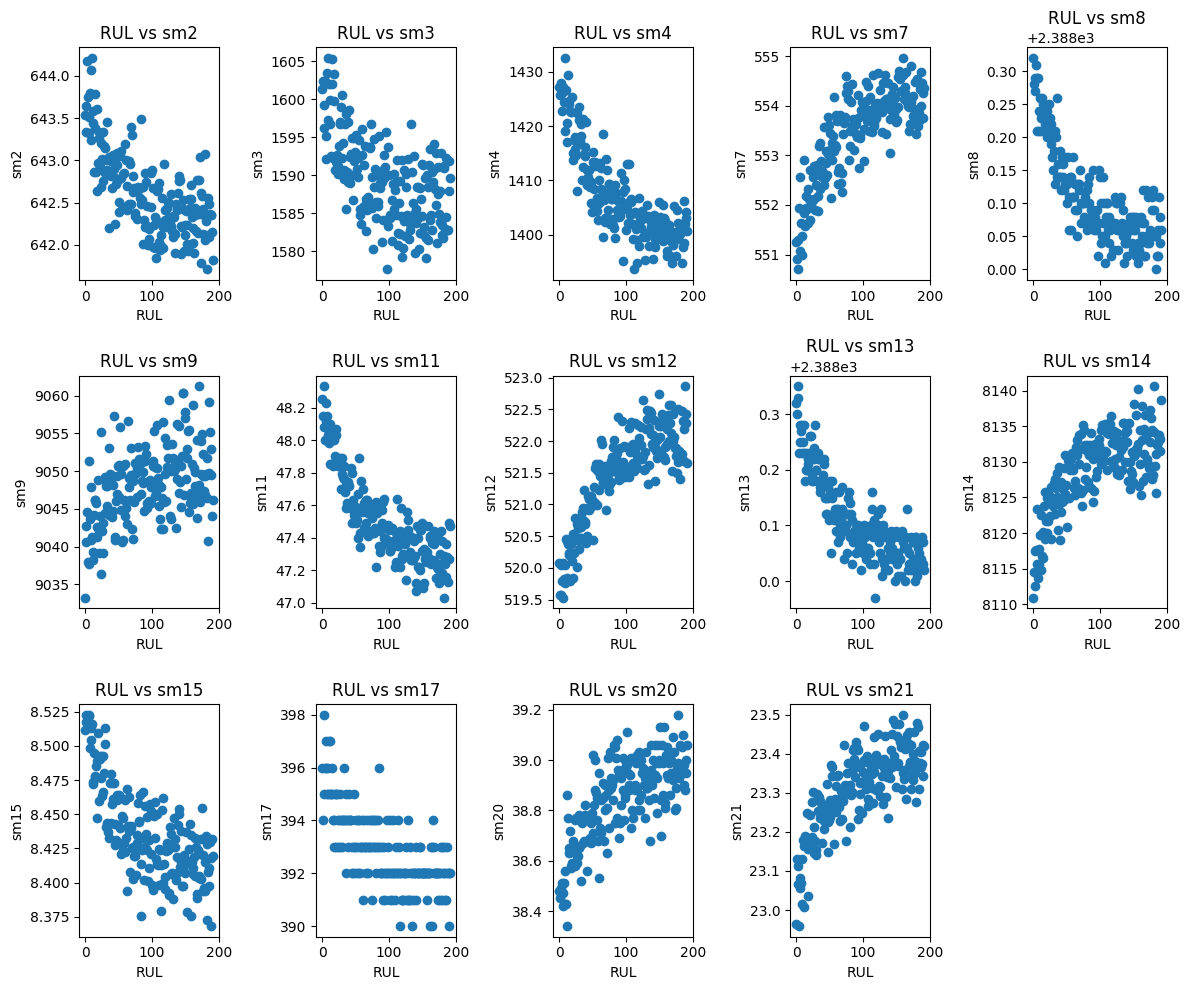

In [9]:
sensor_names = ['sm2', 'sm3', 'sm4', 'sm7', 'sm8', 'sm9', 'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm17', 'sm20', 'sm21']
num_sensors = len(sensor_names)

plt.figure(figsize=(12,10))
for i, sensor in enumerate(sensor_names, start=1):
    plt.subplot(3,5, i)
    plt.scatter(unit1_data['RUL'], unit1_data[sensor])
    plt.xlabel('RUL')
    plt.ylabel(sensor)
    plt.title(f'RUL vs {sensor}')
plt.tight_layout()

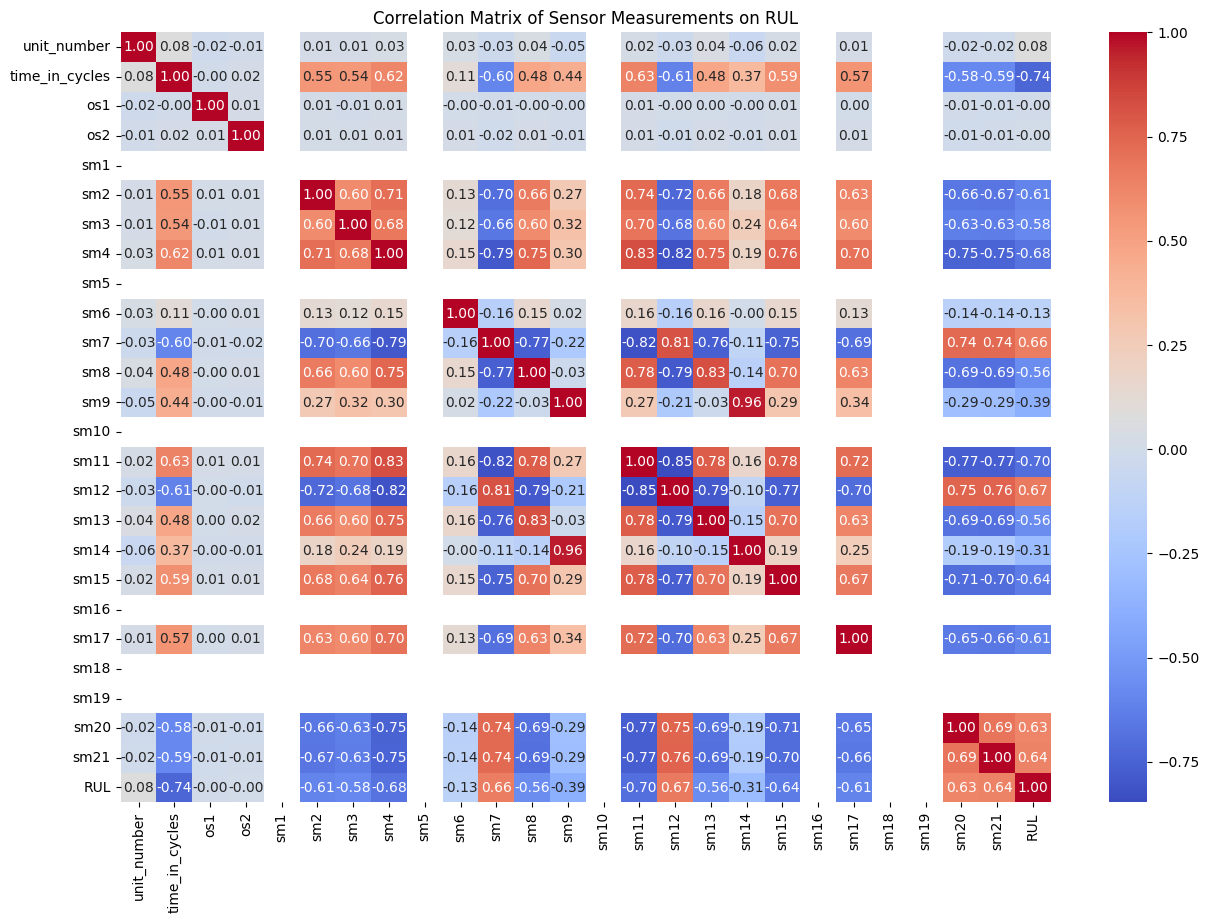

In [10]:
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Sensor Measurements on RUL')
plt.show()

In [11]:
X_raw = data.drop(columns = ['unit_number','time_in_cycles','RUL'])
X_raw.head(2)

,os1,os2,sm1,sm2,sm3,sm4,sm5,sm6,sm7,sm8,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
0,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236


In [12]:
y = data['RUL']
y.head(2)

0    191
1    190
Name: RUL, dtype: int64

In [13]:
# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(X_raw)
X = pd.DataFrame(features_normalized, columns=X_raw.columns)
X.head(2)

,os1,os2,sm1,sm2,sm3,sm4,sm5,sm6,sm7,sm8,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
0,-0.315980,-1.372953,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15,0.141683,1.121141,-0.516338,...,0.334262,-1.058890,-0.269071,-0.603816,-1.387779e-17,-0.78171,0.0,0.0,1.348493,1.194427
1,0.872722,-1.031720,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15,0.141683,0.431930,-0.798093,...,1.174899,-0.363646,-0.642845,-0.275852,-1.387779e-17,-0.78171,0.0,0.0,1.016528,1.236922


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16504, 23), (4127, 23), (16504,), (4127,))

### Baseline Model #1 - Linear Regression

In [15]:
# Create linear regression object
base_model = LinearRegression()

# Train the model using the training sets
base_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_base = base_model.predict(X_test)

# Evaluate the model
r2_base = r2_score(y_test, y_pred_base)
print(f'R² Score: {r2_base}')

rmse = root_mean_squared_error(y_test, y_pred_base)
print(f'RMSE : {rmse}')

R² Score: 0.569645560744755
RMSE : 44.341868070151314


## Test data

In [16]:
test_FD001 = pd.read_csv("/home/meghagkrishnan/code/meghagkrishnan/jet_engine/raw_data/test_FD001.txt",sep = ' ', header=None)
rul_FD001 = pd.read_csv("/home/meghagkrishnan/code/meghagkrishnan/jet_engine/raw_data/RUL_FD001.txt", header=None)

columns = ['unit_number','time_in_cycles','os1', 'os2','os3', 'sm1', 'sm2', 'sm3', 'sm4', 'sm5',
           'sm6', 'sm7', 'sm8', 'sm9', 'sm10', 'sm11', 'sm12','sm13', 'sm14','sm15', 'sm16', 'sm17', 
           'sm18', 'sm19','sm20', 'sm21', 'sm22', 'sm23']
test_FD001.columns = columns
test_FD001 = test_FD001.drop(columns = ['sm22', 'sm23'])

rul_FD001.columns = ['RUL']

# Get the max cycle for each unit in the test dataset
max_cycles_test = test_FD001.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles_test.columns = ['unit_number', 'max_time_in_cycles']

# Merge with the RUL values
max_cycles_test = max_cycles_test.merge(rul_FD001, left_index=True, right_index=True)

# Calculate the RUL for each row in the test dataset
test_FD001 = test_FD001.merge(max_cycles_test[['unit_number', 'max_time_in_cycles', 'RUL']], on='unit_number')
test_FD001['RUL'] = test_FD001['RUL'] + (test_FD001['max_time_in_cycles'] - test_FD001['time_in_cycles'])
test_FD001 = test_FD001.drop(columns=['max_time_in_cycles'])
test_FD001 = test_FD001.drop(columns = ['unit_number','time_in_cycles','os1','os2','os3','sm1','sm5','sm6','sm10','sm16', 'sm18', 'sm19'])
test_FD001.head()

,sm2,sm3,sm4,sm7,sm8,sm9,sm11,sm12,sm13,sm14,sm15,sm17,sm20,sm21,RUL
0,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,142
1,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,141
2,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,140
3,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,139
4,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,138


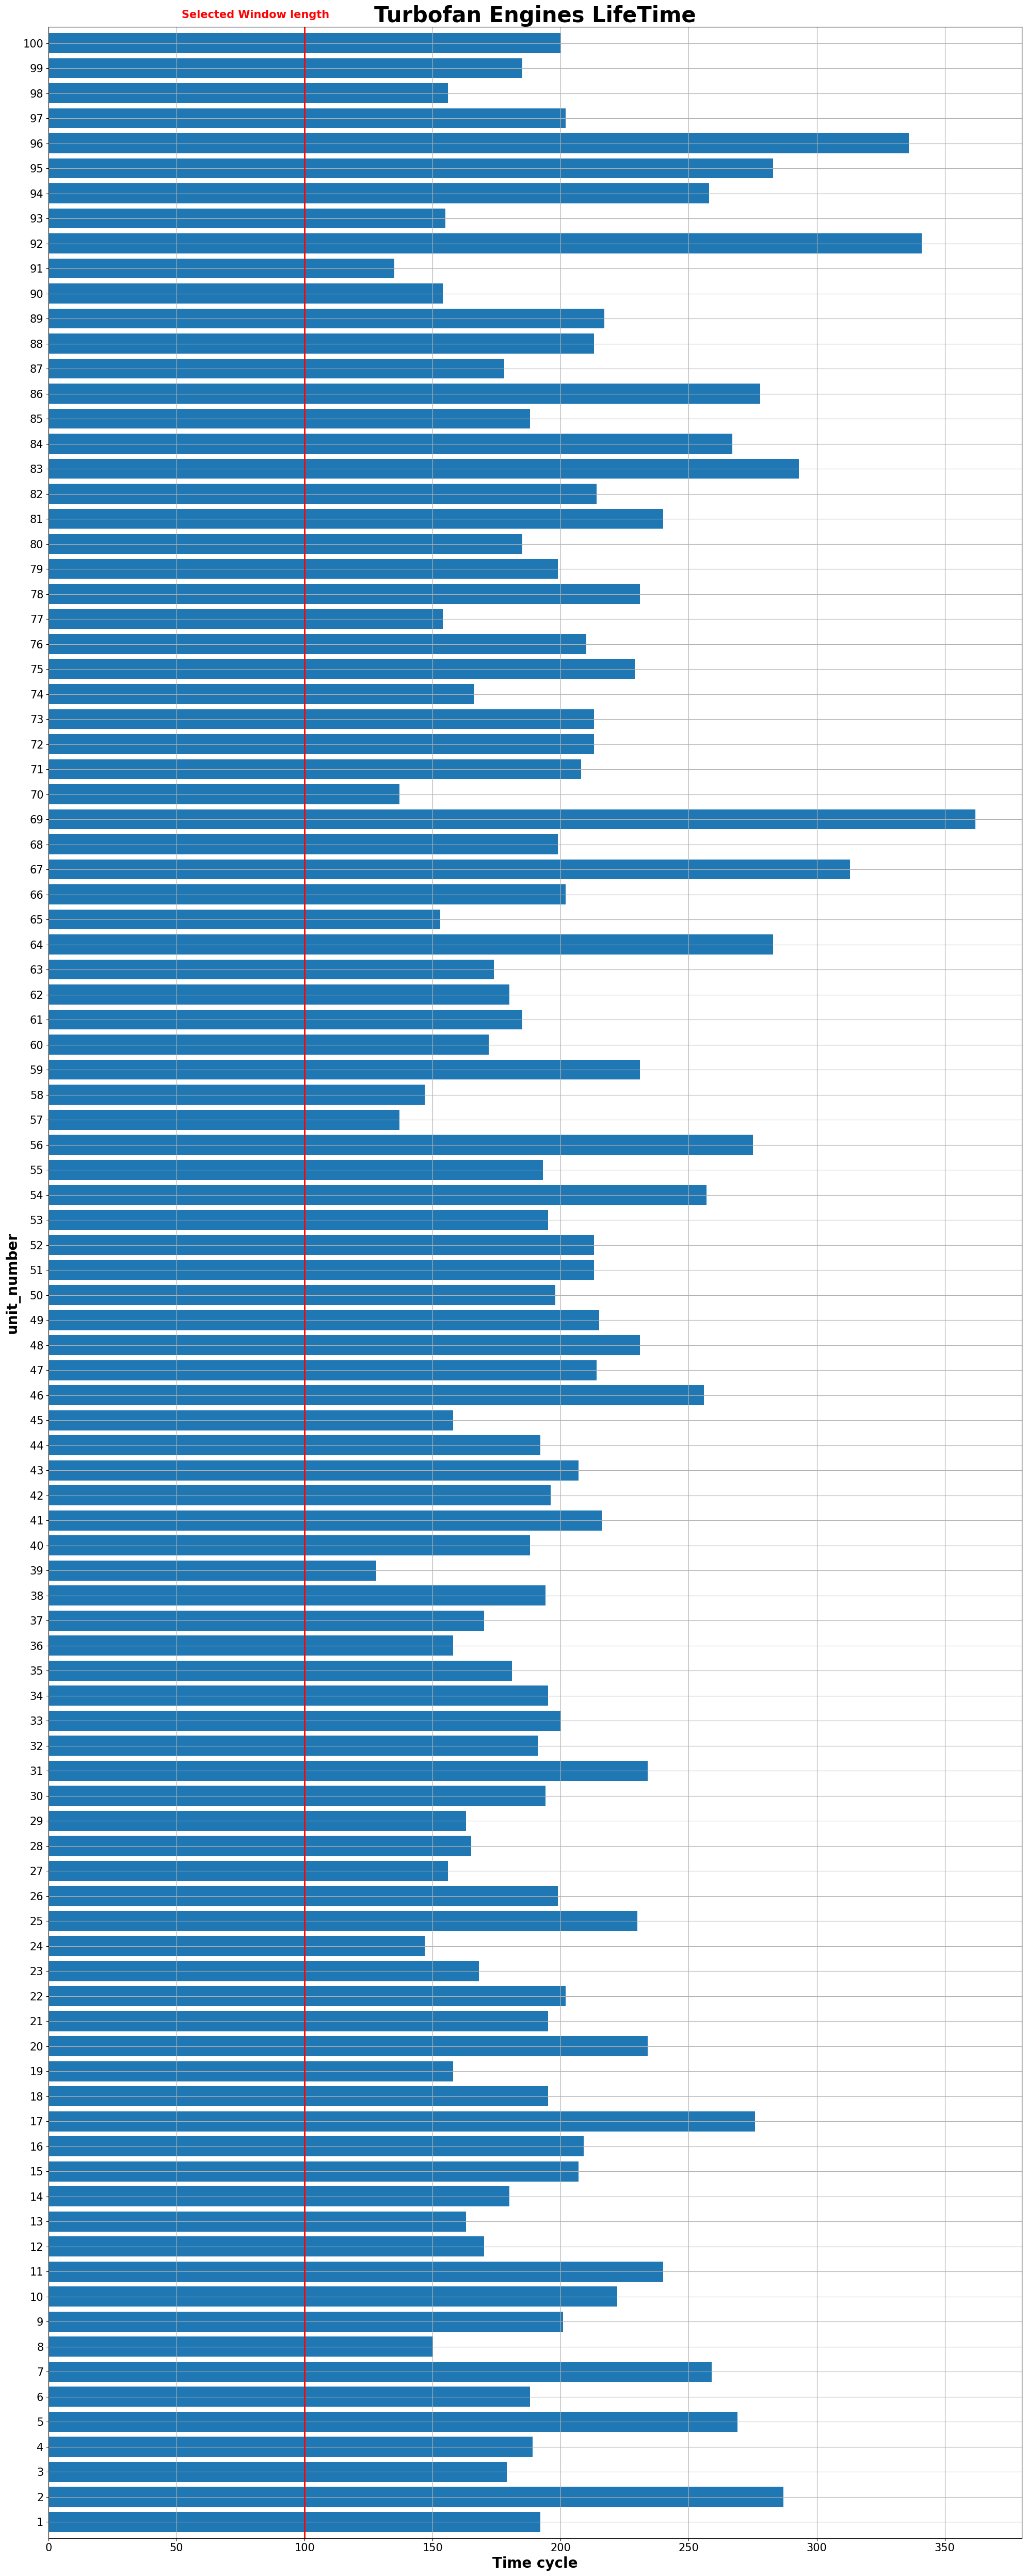

In [17]:
plt.figure(figsize=(20,50))
ax=max_cycles.plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit_number',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)

# Add a vertical line at cycle 50
plt.axvline(x=100, color='red', linewidth=2)
# Annotate the vertical line
plt.text(52, len(max_cycles), 'Selected Window length', color='red', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
len(data[data['unit_number'] <= 80])

16138

In [19]:
data[data['unit_number'] > 80].shape

(4493, 26)

# LSTM

In [33]:
def data_preperation_RNN(data, seq_length=50):
    sequences = []
    labels = []
    for unit in data['unit_number'].unique():
        unit_data = data[data['unit_number'] == unit].sort_values(by='time_in_cycles')
        num_sequences = len(unit_data) - seq_length + 1
        for i in range(num_sequences):
            seq = unit_data.iloc[i:i + seq_length]
            sequences.append(seq.drop(columns=['unit_number', 'time_in_cycles', 'RUL']).values)
            labels.append(seq['RUL'].values[-1])
    return np.array(sequences), np.array(labels)

((12731, 80, 23), (12731,))

In [37]:
# Create sequences
seq_length = 80
X, y = data_preperation_RNN(data, seq_length=seq_length)

# Save the prepared sequences (optional)
#np.save('X_train_FD001.npy', X)
#np.save('y_train_FD001.npy', y)
X.shape, y.shape

((12731, 80, 23), (12731,))

In [38]:
y = np.expand_dims(y, axis=1)
y.shape

(12731, 1)

In [32]:
data.shape

(20631, 26)

In [22]:
data.head(2)

,unit_number,time_in_cycles,os1,os2,sm1,sm2,sm3,sm4,sm5,sm6,...,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,RUL
0,1,1,-0.0007,-0.0004,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190


In [30]:
data.values[1]

array([ 1.00000e+00,  2.00000e+00,  1.90000e-03, -3.00000e-04,
        5.18670e+02,  6.42150e+02,  1.59182e+03,  1.40314e+03,
        1.46200e+01,  2.16100e+01,  5.53750e+02,  2.38804e+03,
        9.04407e+03,  1.30000e+00,  4.74900e+01,  5.22280e+02,
        2.38807e+03,  8.13149e+03,  8.43180e+00,  3.00000e-02,
        3.92000e+02,  2.38800e+03,  1.00000e+02,  3.90000e+01,
        2.34236e+01,  1.90000e+02])

In [ ]:
X,y = data_RNN(data)
X.shape, y.shape

In [ ]:
employee_0 = pd.DataFrame(X[0], columns = [
                'id',
                'cycle',
                'setting1',
                'setting2',
                'T2_Total_temperature_at_fan_inlet',
                'T24_Total_temperature_at_LPC_outlet',
                'T30_Total_temperature_at_HPC_outlet',
                'T50_Total_temperature_at_LPT_outlet',
                'P2_Pressure_at_fan_inlet',
                'P15_Total_pressure_in_bypass_duct',
                'P30_Total_pressure_at_HPC_outlet',
                'Nf_Physical_fan_speed',
                'Nc_Physical_core_speed',
                'epr_Engine_pressure_ratio',
                'Ps30_Static_pressure_at_HPC_outlet',
                'phi_Ratio_of_fuel_flow_to_Ps30',
                'NRf_Corrected_fan_speed',
                'NRc_Corrected_core_speed',
                'BPR_Bypass_Ratio',
                'farB_Burner_fuel_air_ratio',
                'htBleed_Bleed_Enthalpy',
                'Nf_dmd_Demanded_fan_speed',
                'PCNfR_dmd_Demanded_corrected_fan_speed',
                'W31_HPT_coolant_bleed',
                'W32_LPT_coolant_bleed'])
employee_0.head(2)

In [ ]:
rul_FD001 = pd.read_csv("/home/meghagkrishnan/code/meghagkrishnan/jet_engine/backend/raw_data/RUL_FD001.txt", header=None)
rul_FD001.shape

In [ ]:
a=[]
unit_data = data[data['unit_number'] == 1].sort_values(by='time_in_cycles')
unit_data[0:50].drop(columns =['RUL'])
display(int(unit_data['RUL'][50-1]))
a.append(unit_data['RUL'][50-1])
a

In [ ]:
seq_size = 50
X_sequences = []
y_sequences = []
unit_data = data[data['unit_number'] == 1].sort_values(by='time_in_cycles')
X_sequences.append(unit_data[0:seq_size].drop(columns =['RUL']))
y_sequences.append(int(unit_data['RUL'][50]))

In [ ]:
X_sequences

In [ ]:
#import streamlit as st

uploaded_file = open('/home/meghagkrishnan/code/meghagkrishnan/jet_engine/raw_data/test_FD001.txt','r')
uploaded_file

In [ ]:
column_names = [
                'id',
                'cycle',
                'setting1',
                'setting2',
                'setting3',
                'T2_Total_temperature_at_fan_inlet',
                'T24_Total_temperature_at_LPC_outlet',
                'T30_Total_temperature_at_HPC_outlet',
                'T50_Total_temperature_at_LPT_outlet',
                'P2_Pressure_at_fan_inlet',
                'P15_Total_pressure_in_bypass_duct',
                'P30_Total_pressure_at_HPC_outlet',
                'Nf_Physical_fan_speed',
                'Nc_Physical_core_speed',
                'epr_Engine_pressure_ratio',
                'Ps30_Static_pressure_at_HPC_outlet',
                'phi_Ratio_of_fuel_flow_to_Ps30',
                'NRf_Corrected_fan_speed',
                'NRc_Corrected_core_speed',
                'BPR_Bypass_Ratio',
                'farB_Burner_fuel_air_ratio',
                'htBleed_Bleed_Enthalpy',
                'Nf_dmd_Demanded_fan_speed',
                'PCNfR_dmd_Demanded_corrected_fan_speed',
                'W31_HPT_coolant_bleed',
                'W32_LPT_coolant_bleed',
                'sm27', 'sm28']

In [ ]:
import pandas as pd
data = pd.read_csv("/home/meghagkrishnan/code/meghagkrishnan/jet_engine/raw_data/test_FD001.txt",sep = ' ', header=None)
data.columns = column_names
data = data.drop(columns = ['id','cycle','setting3','T2_Total_temperature_at_fan_inlet','P2_Pressure_at_fan_inlet',
                            'P15_Total_pressure_in_bypass_duct','epr_Engine_pressure_ratio','farB_Burner_fuel_air_ratio',
                            'Nf_dmd_Demanded_fan_speed','PCNfR_dmd_Demanded_corrected_fan_speed', 'sm27', 'sm28'])
data_to_predict = data[0:1]
data_to_predict

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length].drop(columns=['RUL'])
        target = data.iloc[i + sequence_length]['RUL']
        sequences.append(seq.values)
        targets.append(target)
    return np.array(sequences), np.array(targets)